***
# Projet Nexialog
Groupe 2 : Hicham, Eskender, Marwan, Gaël, Khedi
***

In [1]:
def set_plot_style():
    import plotly.io as pio
    import seaborn as sns
    import matplotlib.pyplot as plt
    import matplotlib.ticker as mtick

    """
    Set the style for matplotlib and plotly plots.
    """
    pio.templates.default = "plotly_white"

    sns.set_theme(style="whitegrid", palette="muted")

    plt.style.use("default")
    plt.rcParams.update(
        {
            "axes.edgecolor": "white",
            "axes.linewidth": 0.8,
            "axes.grid": True,
            "grid.alpha": 0.2,
            "grid.color": "grey",
            "axes.spines.top": False,
            "axes.spines.right": False,
            "axes.spines.left": False,
            "axes.spines.bottom": False,
            "axes.titlesize": 10,
            "axes.labelsize": 9,
            "xtick.labelsize": 8,
            "ytick.labelsize": 8,
            "figure.dpi": 300,
            "savefig.dpi": 300,
            "figure.figsize": (12, 6),
            "xtick.bottom": False,
            "ytick.left": False,
        }
    )

    # Formatter automatique global pour les axes en millions (M) et milliards (B)
    def auto_format_axes(ax):
        for axis in [ax.xaxis, ax.yaxis]:
            axis.set_major_formatter(
                mtick.FuncFormatter(lambda x, _: f'{x / 1e9:.1f}B' if x >= 1e9 else (f'{x / 1e6:.1f}M' if x >= 1e6 else f'{x:.0f}'))
            )

    # Application automatique pour chaque nouvelle figure
    def apply_global_formatting(event):
        fig = event.canvas.figure
        for ax in fig.get_axes():
            auto_format_axes(ax)

    # Connexion de l'événement pour appliquer automatiquement la mise à jour des axes
    plt.figure().canvas.mpl_connect('draw_event', apply_global_formatting)
set_plot_style()

<Figure size 3600x1800 with 0 Axes>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import numpy as np
from scipy.stats import norm

import warnings

warnings.filterwarnings('ignore')
pd.options.display.max_columns = None

In [12]:
link = "data/"

default_rate = pd.read_excel(link+"taux_de_defaut.xlsx", sheet_name='base')

evo_pib = pd.read_excel(link+"Evo_PIB.xlsx")
inflation = pd.read_excel(link+"inflation.xlsx")
chomage = pd.read_excel(link+"chomage.xlsx", sheet_name='valeurs_trimestrielles')
taux_directeurs = pd.read_excel(link+"Taux_directeurs.xlsx")
taux_change = pd.read_excel(link+"Taux_change.xlsx")
dette = pd.read_excel(link+"dette.xlsx")

In [14]:
evo_pib.rename(columns={'Trimestre': 'Date'}, inplace=True)
chomage.rename(columns={'Période': 'Date'}, inplace=True)
taux_directeurs.rename(columns={'Unnamed: 0': 'Date'}, inplace=True)

In [15]:
"""const              1.7006      0.248      6.870      0.000       1.196       2.206
Taux_chomage      -0.1632      0.026     -6.365      0.000      -0.216      -0.111
Dette_growth_1     4.7129      1.974      2.387      0.023       0.687       8.739
inflation_3       -0.0860      0.019     -4.626      0.000      -0.124      -0.048
PIB_growth         0.0040      0.002      2.421      0.022       0.001       0.007"""

'const              1.7006      0.248      6.870      0.000       1.196       2.206\nTaux_chomage      -0.1632      0.026     -6.365      0.000      -0.216      -0.111\nDette_growth_1     4.7129      1.974      2.387      0.023       0.687       8.739\ninflation_3       -0.0860      0.019     -4.626      0.000      -0.124      -0.048\nPIB_growth         0.0040      0.002      2.421      0.022       0.001       0.007'

In [16]:
start_date = pd.to_datetime("2020-01-01")
end_date = pd.to_datetime("2021-12-31")

In [17]:
pd.read_excel(link+"dette.xlsx")

,Trimestre,Dette
0,2010-T1,1.392860
1,2010-T2,1.369957
2,2010-T3,1.368078
3,2010-T4,1.339099
4,2011-T1,1.338413
5,2011-T2,1.321730
6,2011-T3,1.302315
7,2011-T4,1.289127
8,2012-T1,1.276419
9,2012-T2,1.257867


In [18]:
dette['Dette_growth'] = dette['Dette'].pct_change()

In [19]:
inflation

,Date,Taux_inflation
0,2025-02-28,0.9
1,2025-01-31,1.8
2,2024-12-31,1.8
3,2024-11-30,1.7
4,2024-10-31,1.6
...,...,...
204,2008-02-29,3.2
205,2008-01-31,3.2
206,2007-12-31,2.8
207,2007-11-30,2.6


In [20]:
chomage

,Date,Taux_chomage
0,2024-T4,"7,1"
1,2024-T3,"7,2"
2,2024-T2,"7,1"
3,2024-T1,"7,3"
4,2023-T4,"7,3"
...,...,...
59,2010-T1,9
60,2009-T4,"9,2"
61,2009-T3,"8,8"
62,2009-T2,"8,8"


In [21]:
dette

,Trimestre,Dette,Dette_growth
0,2010-T1,1.392860,NaN
1,2010-T2,1.369957,-0.016443
2,2010-T3,1.368078,-0.001372
3,2010-T4,1.339099,-0.021182
4,2011-T1,1.338413,-0.000512
5,2011-T2,1.321730,-0.012465
6,2011-T3,1.302315,-0.014689
7,2011-T4,1.289127,-0.010126
8,2012-T1,1.276419,-0.009858
9,2012-T2,1.257867,-0.014534


In [22]:
#---------------------------------------------------
# Taux de défaut
#---------------------------------------------------

default_rate['Trimestre'] = default_rate['Date'].dt.to_period('Q').astype(str)
default_rate['Trimestre'] = default_rate['Trimestre'].str.replace('Q', '-T')

#---------------------------------------------------
# Evolution du PIB
#---------------------------------------------------

evo_pib_trim = evo_pib[['Date', 'Produit intérieur brut (PIB)']]
evo_pib_trim.rename(columns={'Date': 'Trimestre'}, inplace=True)

merged_data = pd.merge(default_rate, evo_pib_trim, on='Trimestre', how='left')

#---------------------------------------------------
# Inflation
#---------------------------------------------------

inflation['Trimestre'] = pd.to_datetime(inflation['Date']).dt.to_period('Q').astype(str)
inflation['Trimestre'] = inflation['Trimestre'].str.replace('Q', '-T')

merged_data = pd.merge(merged_data, inflation[['Trimestre', 'Taux_inflation']], on='Trimestre', how='left')

#---------------------------------------------------
# Chomage
#---------------------------------------------------

merged_data = pd.merge(merged_data, chomage.rename(columns={'Date': 'Trimestre'}), on='Trimestre', how='left')

#---------------------------------------------------
# Taux directeurs
#---------------------------------------------------

taux_directeurs['Trimestre'] = pd.to_datetime(taux_directeurs['Date']).dt.to_period('Q').astype(str)
taux_directeurs['Trimestre'] = taux_directeurs['Trimestre'].str.replace('Q', '-T')
merged_data = pd.merge(merged_data, taux_directeurs, on='Trimestre', how='left')

#---------------------------------------------------
# Taux de change
#---------------------------------------------------

taux_change['Trimestre'] = pd.to_datetime(taux_change['Date']).dt.to_period('Q').astype(str)
taux_change['Trimestre'] = taux_change['Trimestre'].str.replace('Q', '-T')
merged_data = pd.merge(merged_data, taux_change, on='Trimestre', how='left')

#---------------------------------------------------
# Dette
#---------------------------------------------------

merged_data = pd.merge(merged_data, dette, on='Trimestre', how='left')

#---------------------------------------------------
# Nettoyage
#---------------------------------------------------

merged_data.drop(columns=['Date', 'Date_y', 'Devise'], inplace=True)
merged_data.rename(columns={'Date_x': 'Date', 'Cours' : 'EUR_USD', 'TD' : 'DR'}, inplace=True)

merged_data = merged_data.drop_duplicates(subset=['Trimestre'], keep='last')
merged_data

,Date,DR,Trimestre,Produit intérieur brut (PIB),Taux_inflation,Taux_chomage,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth
11906,2010-01-31,0.071142,2010-T1,0.234638,1.2,9,0.25,1.00,1.75,0.401,1.3479,1.392860,NaN
23813,2010-04-30,0.062473,2010-T2,0.494014,1.9,"8,9",0.25,1.00,1.75,0.542,1.2271,1.369957,-0.016443
36881,2010-07-31,0.062442,2010-T3,0.666311,1.9,"8,9",0.25,1.00,1.75,0.878,1.3648,1.368078,-0.001372
49949,2010-10-31,0.061222,2010-T4,0.620981,1.8,"8,9",0.25,1.00,1.75,0.817,1.3362,1.339099,-0.021182
62237,2011-01-31,0.059854,2011-T1,1.298832,2.0,"8,8",0.25,1.00,1.75,0.902,1.4207,1.338413,-0.000512
74144,2011-04-30,0.059347,2011-T2,-0.012735,2.2,"8,7",0.50,1.25,2.00,1.715,1.4453,1.321730,-0.012465
87212,2011-07-31,0.057264,2011-T3,0.359131,2.1,"8,8",0.75,1.50,2.25,1.463,1.3503,1.302315,-0.014689
100076,2011-10-31,0.052903,2011-T4,0.306503,2.5,9,0.25,1.00,1.75,0.629,1.2939,1.289127,-0.010126
112751,2012-01-31,0.050594,2012-T1,0.026261,2.6,"9,1",0.25,1.00,1.75,0.388,1.3356,1.276419,-0.009858
124283,2012-04-30,0.051093,2012-T2,-0.433428,2.4,"9,3",0.25,1.00,1.75,0.382,1.2590,1.257867,-0.014534


In [23]:
merged_data.isna().mean() == 0

Date                                        True
DR                                          True
Trimestre                                   True
Produit intérieur brut (PIB)                True
Taux_inflation                              True
Taux_chomage                                True
Facilité de dépôt                           True
Opérations principales de refinancement     True
Facilité de prêt marginal                   True
Interbancaire au jour le jour (Eonia)       True
EUR_USD                                     True
Dette                                       True
Dette_growth                               False
dtype: bool

<div style="text-align: center;">
    <img src="./img/rho_formula.png" alt="Formule rho">
</div>

In [31]:
from scipy.stats import norm

# transformation inverse de la loi normale cumulative
merged_data['transfo_DR'] = norm.ppf(merged_data['DR'])

# Calculer la variance 
merged_data['variance'] = np.var(merged_data['transfo_DR'], ddof=1) 

# ρ 
merged_data['rho'] = merged_data['variance'] / (1 + merged_data['variance'])

var_rho = np.var(merged_data["rho"])
print("vérif rho :", var_rho)

print(np.var(var_rho) / (1 + np.var(var_rho)))

DR = merged_data["DR"]
mean_abs_DR = np.mean(np.abs(merged_data["DR"]))
rho = merged_data["rho"]

merged_data["historic_z"] = norm.ppf(mean_abs_DR) - norm.ppf(DR)

vérif rho : 0.0
0.0


In [26]:
merged_data[["Date", "DR", "transfo_DR", "rho"]]

,Date,DR,transfo_DR,rho
11906,2010-01-31,0.071142,-1.467341,0.022266
23813,2010-04-30,0.062473,-1.534341,0.022266
36881,2010-07-31,0.062442,-1.534592,0.022266
49949,2010-10-31,0.061222,-1.544595,0.022266
62237,2011-01-31,0.059854,-1.556001,0.022266
74144,2011-04-30,0.059347,-1.560277,0.022266
87212,2011-07-31,0.057264,-1.578166,0.022266
100076,2011-10-31,0.052903,-1.617331,0.022266
112751,2012-01-31,0.050594,-1.639120,0.022266
124283,2012-04-30,0.051093,-1.634349,0.022266


$ \Phi^{-1}(\overline{\sqrt{\text{DR}}}) - \Phi^{-1}(\text{DR}) $

In [32]:
DR = merged_data["DR"]
mean_abs_DR = np.mean(np.abs(merged_data["DR"]))
rho = merged_data["rho"]

merged_data["historic_z"] = norm.ppf(mean_abs_DR) - norm.ppf(DR)

In [33]:
merged_data[["Date", "DR", "transfo_DR", "rho", "historic_z"]]

,Date,DR,transfo_DR,rho,historic_z
11906,2010-01-31,0.071142,-1.467341,0.022266,-0.205827
23813,2010-04-30,0.062473,-1.534341,0.022266,-0.138827
36881,2010-07-31,0.062442,-1.534592,0.022266,-0.138576
49949,2010-10-31,0.061222,-1.544595,0.022266,-0.128573
62237,2011-01-31,0.059854,-1.556001,0.022266,-0.117167
74144,2011-04-30,0.059347,-1.560277,0.022266,-0.112891
87212,2011-07-31,0.057264,-1.578166,0.022266,-0.095001
100076,2011-10-31,0.052903,-1.617331,0.022266,-0.055837
112751,2012-01-31,0.050594,-1.639120,0.022266,-0.034048
124283,2012-04-30,0.051093,-1.634349,0.022266,-0.038818



### Corrélations

In [35]:
liste_keep_loop = [c for c in merged_data.columns if c not in ["variance", "rho", "transfo_DR", "DR",
                                                               "Facilité de prêt marginal", "Facilité de dépôt",
                                                               "Opérations principales de refinancement"]]

tab_corr = pd.DataFrame()

# Corrélation entre toutes les variables et historic_z
for i in range(len(merged_data) - 8):
    """Sépare la table principale en groupes de 8 trimestres consécutifs pour pouvoir comparer par année"""
    df_temp = merged_data.iloc[i:i+8, :]

    time_delta = f"{df_temp['Trimestre'].iloc[0]} / {df_temp['Trimestre'].iloc[-1]}"

    correlation = pd.DataFrame(df_temp[liste_keep_loop]
                                .select_dtypes(include='number')
                                .corrwith(df_temp["historic_z"])
                                .abs() # valeur absolue pour mesurer uniqument le poids des corrélations
                                .sort_values(ascending=False), # s'applique uniquement sur la 1ère ligne
                               columns=[time_delta]
                              ).T # transposée pour avoir les trimestres concernés en index (lignes)
    
    tab_corr = pd.concat([tab_corr, correlation], ignore_index=False)

tab_corr.drop(columns=["historic_z"], inplace=True)

print("Corrélation annuelle (intervalle de 4 trimestres) avec historic_z :")
tab_corr = tab_corr.style.background_gradient(cmap='coolwarm', axis=None)
tab_corr

Corrélation annuelle (intervalle de 4 trimestres) avec historic_z :


,Taux_inflation,Dette,Interbancaire au jour le jour (Eonia),EUR_USD,Produit intérieur brut (PIB),Dette_growth
2010-T1 / 2011-T4,0.968385,0.935852,0.396477,0.021164,0.011190,0.005591
2010-T2 / 2012-T1,0.955059,0.942911,0.291083,0.072043,0.510680,0.035575
2010-T3 / 2012-T2,0.935365,0.954492,0.589587,0.657698,0.676298,0.196315
2010-T4 / 2012-T3,0.921733,0.802452,0.598396,0.673807,0.657923,0.081722
2011-T1 / 2012-T4,0.912210,0.375386,0.489921,0.723944,0.546839,0.118116
2011-T2 / 2013-T1,0.745465,0.104418,0.303231,0.454013,0.316295,0.167140
2011-T3 / 2013-T2,0.775033,0.585163,0.081031,0.176528,0.550037,0.165164
2011-T4 / 2013-T3,0.837676,0.915329,0.684431,0.410170,0.310374,0.192523
2012-T1 / 2013-T4,0.874741,0.976948,0.140699,0.630556,0.578024,0.070492
2012-T2 / 2014-T1,0.854916,0.967971,0.423326,0.935764,0.410131,0.083972


In [36]:
liste_keep = [c for c in merged_data.columns if c not in ["variance", "rho"]]

pd.DataFrame(merged_data[liste_keep]
            .select_dtypes(include='number')
            .corrwith(merged_data["historic_z"])
            .abs()
            .sort_values(ascending=False),
            columns=[time_delta]
            ).T.style.background_gradient(cmap='coolwarm', axis=None)

,transfo_DR,historic_z,DR,Facilité de dépôt,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Facilité de prêt marginal,Opérations principales de refinancement,Dette_growth,Produit intérieur brut (PIB),Taux_inflation
2017-T4 / 2019-T3,1.000000,1.000000,0.997524,0.792723,0.777826,0.769300,0.714052,0.693674,0.679288,0.587119,0.078081,0.049837


In [37]:
#Pearson
merged_data[liste_keep].select_dtypes(include='number').corr(method='pearson').style.background_gradient(cmap='coolwarm', axis=None)

,DR,Produit intérieur brut (PIB),Taux_inflation,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,historic_z
DR,1.000000,-0.059350,0.059872,0.786532,0.673637,0.689017,0.775581,0.786691,0.720115,-0.582194,0.997524,-0.997524
Produit intérieur brut (PIB),-0.059350,1.000000,0.092070,-0.022706,-0.034665,-0.037739,0.012416,0.002627,0.084067,0.353885,-0.078081,0.078081
Taux_inflation,0.059872,0.092070,1.000000,0.447800,0.589392,0.595884,0.349523,0.435969,0.518173,-0.194882,0.049837,-0.049837
Facilité de dépôt,0.786532,-0.022706,0.447800,1.000000,0.955382,0.943000,0.942705,0.802455,0.894130,-0.578942,0.792723,-0.792723
Opérations principales de refinancement,0.673637,-0.034665,0.589392,0.955382,1.000000,0.995733,0.856586,0.751195,0.934557,-0.559755,0.679288,-0.679288
Facilité de prêt marginal,0.689017,-0.037739,0.595884,0.943000,0.995733,1.000000,0.837888,0.763388,0.935997,-0.571387,0.693674,-0.693674
Interbancaire au jour le jour (Eonia),0.775581,0.012416,0.349523,0.942705,0.856586,0.837888,1.000000,0.822005,0.814573,-0.533252,0.777826,-0.777826
EUR_USD,0.786691,0.002627,0.435969,0.802455,0.751195,0.763388,0.822005,1.000000,0.739369,-0.459056,0.769300,-0.769300
Dette,0.720115,0.084067,0.518173,0.894130,0.934557,0.935997,0.814573,0.739369,1.000000,-0.496465,0.714052,-0.714052
Dette_growth,-0.582194,0.353885,-0.194882,-0.578942,-0.559755,-0.571387,-0.533252,-0.459056,-0.496465,1.000000,-0.587119,0.587119


In [39]:
#Kendall
merged_data[liste_keep].select_dtypes(include='number').corr(method='kendall').style.background_gradient(cmap='coolwarm', axis=None)

,DR,Produit intérieur brut (PIB),Taux_inflation,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,historic_z
DR,1.000000,-0.098781,-0.062424,0.598577,0.596696,0.596696,0.630700,0.450289,0.568313,-0.410534,1.000000,-1.000000
Produit intérieur brut (PIB),-0.098781,1.000000,0.063684,-0.041402,-0.075263,-0.075263,-0.048781,-0.023077,-0.002564,0.271255,-0.098781,0.098781
Taux_inflation,-0.062424,0.063684,1.000000,0.289457,0.306655,0.306655,0.115819,0.302822,0.295024,-0.128514,-0.062424,0.062424
Facilité de dépôt,0.598577,-0.041402,0.289457,1.000000,0.960606,0.960606,0.839118,0.583916,0.818054,-0.464582,0.598577,-0.598577
Opérations principales de refinancement,0.596696,-0.075263,0.306655,0.960606,1.000000,1.000000,0.779681,0.547103,0.851049,-0.472867,0.596696,-0.596696
Facilité de prêt marginal,0.596696,-0.075263,0.306655,0.960606,1.000000,1.000000,0.779681,0.547103,0.851049,-0.472867,0.596696,-0.596696
Interbancaire au jour le jour (Eonia),0.630700,-0.048781,0.115819,0.839118,0.779681,0.779681,1.000000,0.575097,0.646984,-0.390541,0.630700,-0.630700
EUR_USD,0.450289,-0.023077,0.302822,0.583916,0.547103,0.547103,0.575097,1.000000,0.538462,-0.322537,0.450289,-0.450289
Dette,0.568313,-0.002564,0.295024,0.818054,0.851049,0.851049,0.646984,0.538462,1.000000,-0.371120,0.568313,-0.568313
Dette_growth,-0.410534,0.271255,-0.128514,-0.464582,-0.472867,-0.472867,-0.390541,-0.322537,-0.371120,1.000000,-0.410534,0.410534


In [40]:
# export Kendall to HTML
styled_correlation = merged_data[liste_keep].select_dtypes(include='number').corr(method='kendall').style.background_gradient(cmap='coolwarm', axis=None)

# Enregistrement en fichier HTML
correlation_html = styled_correlation.to_html()
with open("correlation_kendall.html", "w") as file:
    file.write(correlation_html)

In [41]:
#Spearman
merged_data[liste_keep].select_dtypes(include='number').corr(method='spearman').style.background_gradient(cmap='coolwarm', axis=None)

,DR,Produit intérieur brut (PIB),Taux_inflation,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,historic_z
DR,1.000000,-0.121394,-0.020759,0.789123,0.790214,0.790214,0.845991,0.697406,0.784652,-0.594160,1.000000,-1.000000
Produit intérieur brut (PIB),-0.121394,1.000000,0.071385,-0.053733,-0.114736,-0.114736,-0.053945,-0.038274,-0.024015,0.381377,-0.121394,0.121394
Taux_inflation,-0.020759,0.071385,1.000000,0.377481,0.395199,0.395199,0.190597,0.440615,0.440521,-0.190008,-0.020759,0.020759
Facilité de dépôt,0.789123,-0.053733,0.377481,1.000000,0.985521,0.985521,0.945639,0.770917,0.935016,-0.607630,0.789123,-0.789123
Opérations principales de refinancement,0.790214,-0.114736,0.395199,0.985521,1.000000,1.000000,0.918659,0.750956,0.949403,-0.614222,0.790214,-0.790214
Facilité de prêt marginal,0.790214,-0.114736,0.395199,0.985521,1.000000,1.000000,0.918659,0.750956,0.949403,-0.614222,0.790214,-0.790214
Interbancaire au jour le jour (Eonia),0.845991,-0.053945,0.190597,0.945639,0.918659,0.918659,1.000000,0.781030,0.857773,-0.574653,0.845991,-0.845991
EUR_USD,0.697406,-0.038274,0.440615,0.770917,0.750956,0.750956,0.781030,1.000000,0.772045,-0.453441,0.697406,-0.697406
Dette,0.784652,-0.024015,0.440521,0.935016,0.949403,0.949403,0.857773,0.772045,1.000000,-0.508502,0.784652,-0.784652
Dette_growth,-0.594160,0.381377,-0.190008,-0.607630,-0.614222,-0.614222,-0.574653,-0.453441,-0.508502,1.000000,-0.594160,0.594160


#### Régressions

In [42]:
print(merged_data.dtypes)

Date                                       datetime64[ns]
DR                                                float64
Trimestre                                          object
Produit intérieur brut (PIB)                      float64
Taux_inflation                                    float64
Taux_chomage                                       object
Facilité de dépôt                                 float64
Opérations principales de refinancement           float64
Facilité de prêt marginal                         float64
Interbancaire au jour le jour (Eonia)             float64
EUR_USD                                           float64
Dette                                             float64
Dette_growth                                      float64
transfo_DR                                        float64
variance                                          float64
rho                                               float64
historic_z                                        float64
dtype: object


In [43]:
merged_data['Taux_chomage']

11906       9
23813     8,9
36881     8,9
49949     8,9
62237     8,8
74144     8,7
87212     8,8
100076      9
112751    9,1
124283    9,3
136958    9,4
149246    9,8
160778     10
172307    10,
185375    9,9
197663    9,8
209570    9,8
220730    9,8
233798    9,9
246086    10,
257993     10
269339    10,
282407     10
295082    9,9
306614    9,9
319289    9,7
332357    9,6
344837    9,8
357512    9,3
369230    9,2
381905    9,2
394190    8,7
406475    8,9
418571    8,8
431246    8,6
443726    8,4
455633    8,5
467537    8,2
480605    8,1
493085    7,9
Name: Taux_chomage, dtype: object

In [48]:
# à run une seule fois !

#merged_data['Taux_chomage'] = merged_data['Taux_chomage'].str.replace(',', '.')
#merged_data['Taux_chomage'] = merged_data['Taux_chomage'].astype(float)

In [49]:
import statsmodels.api as sm

X = merged_data[['Taux_chomage', 'Dette', 'Taux_inflation', 'Produit intérieur brut (PIB)']]
y = merged_data['historic_z']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.817
Model:                            OLS   Adj. R-squared:                  0.796
Method:                 Least Squares   F-statistic:                     39.09
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           1.88e-12
Time:                        20:44:54   Log-Likelihood:                 53.369
No. Observations:                  40   AIC:                            -96.74
Df Residuals:                      35   BIC:                            -88.29
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [50]:
X = merged_data[['Taux_chomage', 'Dette']]
y = merged_data['historic_z']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.806
Model:                            OLS   Adj. R-squared:                  0.795
Method:                 Least Squares   F-statistic:                     76.67
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           6.93e-14
Time:                        20:45:04   Log-Likelihood:                 52.149
No. Observations:                  40   AIC:                            -98.30
Df Residuals:                      37   BIC:                            -93.23
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            2.9431      0.244     12.056   

In [ ]:
import statsmodels.api as sm

merged_data['PIB_growth'] = merged_data['Produit intérieur brut (PIB)'].pct_change()
merged_data['Dette_growth'] = merged_data['Dette'].pct_change()

merged_data.dropna(inplace=True)

X = merged_data[['Taux_chomage', 'Dette_growth','Taux_inflation','PIB_growth']]
y = merged_data['historic_z']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()

print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.522
Model:                            OLS   Adj. R-squared:                  0.466
Method:                 Least Squares   F-statistic:                     9.275
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           3.53e-05
Time:                        20:45:53   Log-Likelihood:                 33.965
No. Observations:                  39   AIC:                            -57.93
Df Residuals:                      34   BIC:                            -49.61
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              1.4065      0.384      3.

##### Ajout des lags

In [52]:
merged_data['PIB_growth'] = merged_data['Produit intérieur brut (PIB)'].pct_change()
merged_data['Dette_growth'] = merged_data['Dette'].pct_change()
merged_data_lags = merged_data.copy()

for lag in range(1, 4):  
    merged_data_lags[f'historic_z_{lag}'] = merged_data_lags['historic_z'].shift(lag)
    merged_data_lags[f'Dette_growth_{lag}'] = merged_data_lags['Dette_growth'].shift(lag)
    merged_data_lags[f'tx_chomage_{lag}'] = merged_data_lags['Taux_chomage'].shift(lag)
    merged_data_lags[f'PIB_growth_{lag}'] = merged_data_lags['PIB_growth'].shift(lag)
    merged_data_lags[f'inflation_{lag}'] = merged_data_lags['Taux_inflation'].shift(lag)

In [53]:
merged_data_lags.columns

Index(['Date', 'DR', 'Trimestre', 'Produit intérieur brut (PIB)',
       'Taux_inflation', 'Taux_chomage', 'Facilité de dépôt',
       'Opérations principales de refinancement', 'Facilité de prêt marginal',
       'Interbancaire au jour le jour (Eonia)', 'EUR_USD', 'Dette',
       'Dette_growth', 'transfo_DR', 'variance', 'rho', 'historic_z',
       'PIB_growth', 'historic_z_1', 'Dette_growth_1', 'tx_chomage_1',
       'PIB_growth_1', 'inflation_1', 'historic_z_2', 'Dette_growth_2',
       'tx_chomage_2', 'PIB_growth_2', 'inflation_2', 'historic_z_3',
       'Dette_growth_3', 'tx_chomage_3', 'PIB_growth_3', 'inflation_3'],
      dtype='object')

In [54]:
X_lag1 = merged_data_lags[["tx_chomage_1", "Dette_growth_1", "inflation_1", "PIB_growth_1", "historic_z_1"]].dropna()
y_lag1 = merged_data_lags.loc[X_lag1.index, "historic_z"]

X_lag1 = sm.add_constant(X_lag1)
model_lag1 = sm.OLS(y_lag1, X_lag1).fit()

print(model_lag1.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.979
Model:                            OLS   Adj. R-squared:                  0.975
Method:                 Least Squares   F-statistic:                     284.0
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           6.44e-25
Time:                        20:46:26   Log-Likelihood:                 90.031
No. Observations:                  37   AIC:                            -168.1
Df Residuals:                      31   BIC:                            -158.4
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.0817      0.113      0.

In [55]:
X_lag2 = merged_data_lags[["tx_chomage_2", "Dette_growth_2", "inflation_2", "PIB_growth_2", "historic_z_2"]].dropna()
y_lag2 = merged_data_lags.loc[X_lag2.index, "historic_z"]

X_lag2 = sm.add_constant(X_lag2)
model_lag2 = sm.OLS(y_lag2, X_lag2).fit()

print(model_lag2.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.939
Method:                 Least Squares   F-statistic:                     108.7
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           2.76e-18
Time:                        20:46:28   Log-Likelihood:                 71.606
No. Observations:                  36   AIC:                            -131.2
Df Residuals:                      30   BIC:                            -121.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.3141      0.200      1.

In [57]:
X_lag3 = merged_data_lags[["tx_chomage_3", "Dette_growth_3", "inflation_3", "PIB_growth_3", "historic_z_3"]].dropna()
y_lag3 = merged_data_lags.loc[X_lag3.index, "historic_z"]

X_lag3 = sm.add_constant(X_lag3)
model_lag3 = sm.OLS(y_lag3, X_lag3).fit()

print(model_lag3.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.932
Model:                            OLS   Adj. R-squared:                  0.920
Method:                 Least Squares   F-statistic:                     79.00
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           5.46e-16
Time:                        20:48:45   Log-Likelihood:                 65.018
No. Observations:                  35   AIC:                            -118.0
Df Residuals:                      29   BIC:                            -108.7
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7102      0.259      2.

In [56]:
X_lag3 = merged_data_lags[["tx_chomage_3", "Dette_growth_2", "inflation_3", "PIB_growth", "historic_z_3"]].dropna()
y_lag3 = merged_data_lags.loc[X_lag3.index, "historic_z"]

X_lag3 = sm.add_constant(X_lag3)
model_lag3 = sm.OLS(y_lag3, X_lag3).fit()

print(model_lag3.summary())

                            OLS Regression Results                            
Dep. Variable:             historic_z   R-squared:                       0.937
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     89.60
Date:                Sat, 07 Jun 2025   Prob (F-statistic):           4.16e-17
Time:                        20:46:41   Log-Likelihood:                 68.334
No. Observations:                  36   AIC:                            -124.7
Df Residuals:                      30   BIC:                            -115.2
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const              0.7703      0.232      3.

Lag 1 : meilleurs R^2, AIC et BIC

In [59]:
merged_data[["Date", "DR","transfo_DR","rho"]].to_excel(link+"merged_data.xlsx", index=False)

### Données projection (T1-T4 : 2020, 2021, 2022)

In [60]:
data_dette = {
    "Trimestre": [
        "2020-T1", "2020-T2", "2020-T3", "2020-T4",
        "2021-T1", "2021-T2", "2021-T3", "2021-T4",
        "2022-T1", "2022-T2", "2022-T3", "2022-T4",
        "2023-T1", "2023-T2", "2023-T3", "2023-T4"
    ],
    "Dette": [
        2.4385, 2.6383, 2.6743, 2.6501,
        2.7392, 2.7620, 2.8343, 2.8131,
        2.9018, 2.9168, 2.9568, 2.9500,
        3.0134, 3.0469, 3.0882, 3.1012
    ]
}

In [61]:
dette_full = pd.concat([dette, pd.DataFrame(data_dette)])

In [62]:
merged_data['PIB_growth'] = merged_data['Produit intérieur brut (PIB)'].pct_change()
merged_data['Dette_growth'] = merged_data['Dette'].pct_change()
merged_data

,Date,DR,Trimestre,Produit intérieur brut (PIB),Taux_inflation,Taux_chomage,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,variance,rho,historic_z,PIB_growth
23813,2010-04-30,0.062473,2010-T2,0.494014,1.9,8.9,0.25,1.00,1.75,0.542,1.2271,1.369957,NaN,-1.534341,0.022773,0.022266,-0.138827,NaN
36881,2010-07-31,0.062442,2010-T3,0.666311,1.9,8.9,0.25,1.00,1.75,0.878,1.3648,1.368078,-0.001372,-1.534592,0.022773,0.022266,-0.138576,0.348770
49949,2010-10-31,0.061222,2010-T4,0.620981,1.8,8.9,0.25,1.00,1.75,0.817,1.3362,1.339099,-0.021182,-1.544595,0.022773,0.022266,-0.128573,-0.068033
62237,2011-01-31,0.059854,2011-T1,1.298832,2.0,8.8,0.25,1.00,1.75,0.902,1.4207,1.338413,-0.000512,-1.556001,0.022773,0.022266,-0.117167,1.091582
74144,2011-04-30,0.059347,2011-T2,-0.012735,2.2,8.7,0.50,1.25,2.00,1.715,1.4453,1.321730,-0.012465,-1.560277,0.022773,0.022266,-0.112891,-1.009805
87212,2011-07-31,0.057264,2011-T3,0.359131,2.1,8.8,0.75,1.50,2.25,1.463,1.3503,1.302315,-0.014689,-1.578166,0.022773,0.022266,-0.095001,-29.200551
100076,2011-10-31,0.052903,2011-T4,0.306503,2.5,9.0,0.25,1.00,1.75,0.629,1.2939,1.289127,-0.010126,-1.617331,0.022773,0.022266,-0.055837,-0.146542
112751,2012-01-31,0.050594,2012-T1,0.026261,2.6,9.1,0.25,1.00,1.75,0.388,1.3356,1.276419,-0.009858,-1.639120,0.022773,0.022266,-0.034048,-0.914320
124283,2012-04-30,0.051093,2012-T2,-0.433428,2.4,9.3,0.25,1.00,1.75,0.382,1.2590,1.257867,-0.014534,-1.634349,0.022773,0.022266,-0.038818,-17.504439
136958,2012-07-31,0.055584,2012-T3,0.227264,2.2,9.4,0.00,0.75,1.50,0.107,1.2930,1.246924,-0.008699,-1.592968,0.022773,0.022266,-0.080200,-1.524340


In [64]:
index = ["2020-T1", "2020-T2", "2020-T3", "2020-T4",
         "2021-T1", "2021-T2", "2021-T3", "2021-T4",
         "2022-T1", "2022-T2", "2022-T3", "2022-T4"]

PIB = pd.Series([0.275,0.275,0.275,0.275, 0.325,0.325,0.325,0.325, 0.325,0.325,0.325,0.325], index=index, name="PIB")

Taux_chomage = pd.Series([8.2,8.2,8.2,8.2, 8.1,8.1,8.1,8.1, 8.0,8.0,8.0,8.0], index=index, name="Taux_chomage")
Dette = pd.Series([1.12942857,1.12928571,1.12914286,1.129, 1.129,1.12533333,1.12166667,1.118, 1.118, 1.111, 1.104, 1.097], index=index, name="Dette")
Taux_inflation = pd.Series([1.1,1.1,1.1,1.1, 1.3,1.3,1.3,1.3, 1.4,1.4,1.4,1.4], index=index, name="Taux_inflation")
data_20_22 = pd.DataFrame({
    "Trimestre": index,
    "Produit intérieur brut (PIB)": PIB,
    "Taux_chomage": Taux_chomage,
    "Taux_inflation": Taux_inflation,
    "Dette": Dette
})
data_20_22

,Trimestre,Produit intérieur brut (PIB),Taux_chomage,Taux_inflation,Dette
2020-T1,2020-T1,0.275,8.2,1.1,1.129429
2020-T2,2020-T2,0.275,8.2,1.1,1.129286
2020-T3,2020-T3,0.275,8.2,1.1,1.129143
2020-T4,2020-T4,0.275,8.2,1.1,1.129000
2021-T1,2021-T1,0.325,8.1,1.3,1.129000
2021-T2,2021-T2,0.325,8.1,1.3,1.125333
2021-T3,2021-T3,0.325,8.1,1.3,1.121667
2021-T4,2021-T4,0.325,8.1,1.3,1.118000
2022-T1,2022-T1,0.325,8.0,1.4,1.118000
2022-T2,2022-T2,0.325,8.0,1.4,1.111000


In [65]:
merged_data = pd.concat([merged_data, data_20_22])

In [66]:
merged_data_lags = merged_data.copy()
merged_data_lags["PIB_growth"] = merged_data_lags["Produit intérieur brut (PIB)"].pct_change()
merged_data_lags["Dette_growth"] = merged_data_lags["Dette"].pct_change()

for lag in range(1, 4):  
    merged_data_lags[f'Dette_growth_{lag}'] = merged_data_lags['Dette_growth'].shift(lag)
    merged_data_lags[f'tx_chomage_{lag}'] = merged_data_lags['Taux_chomage'].shift(lag)
    merged_data_lags[f'PIB_growth_{lag}'] = merged_data_lags['PIB_growth'].shift(lag)
    merged_data_lags[f'inflation_{lag}'] = merged_data_lags['Taux_inflation'].shift(lag)
merged_data_lags

,Date,DR,Trimestre,Produit intérieur brut (PIB),Taux_inflation,Taux_chomage,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,variance,rho,historic_z,PIB_growth,Dette_growth_1,tx_chomage_1,PIB_growth_1,inflation_1,Dette_growth_2,tx_chomage_2,PIB_growth_2,inflation_2,Dette_growth_3,tx_chomage_3,PIB_growth_3,inflation_3
23813,2010-04-30,0.062473,2010-T2,0.494014,1.9,8.9,0.25,1.00,1.75,0.542,1.2271,1.369957,NaN,-1.534341,0.022773,0.022266,-0.138827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36881,2010-07-31,0.062442,2010-T3,0.666311,1.9,8.9,0.25,1.00,1.75,0.878,1.3648,1.368078,-0.001372,-1.534592,0.022773,0.022266,-0.138576,0.348770,NaN,8.9,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49949,2010-10-31,0.061222,2010-T4,0.620981,1.8,8.9,0.25,1.00,1.75,0.817,1.3362,1.339099,-0.021182,-1.544595,0.022773,0.022266,-0.128573,-0.068033,-0.001372,8.9,0.348770,1.9,NaN,8.9,NaN,1.9,NaN,NaN,NaN,NaN
62237,2011-01-31,0.059854,2011-T1,1.298832,2.0,8.8,0.25,1.00,1.75,0.902,1.4207,1.338413,-0.000512,-1.556001,0.022773,0.022266,-0.117167,1.091582,-0.021182,8.9,-0.068033,1.8,-0.001372,8.9,0.348770,1.9,NaN,8.9,NaN,1.9
74144,2011-04-30,0.059347,2011-T2,-0.012735,2.2,8.7,0.50,1.25,2.00,1.715,1.4453,1.321730,-0.012465,-1.560277,0.022773,0.022266,-0.112891,-1.009805,-0.000512,8.8,1.091582,2.0,-0.021182,8.9,-0.068033,1.8,-0.001372,8.9,0.348770,1.9
87212,2011-07-31,0.057264,2011-T3,0.359131,2.1,8.8,0.75,1.50,2.25,1.463,1.3503,1.302315,-0.014689,-1.578166,0.022773,0.022266,-0.095001,-29.200551,-0.012465,8.7,-1.009805,2.2,-0.000512,8.8,1.091582,2.0,-0.021182,8.9,-0.068033,1.8
100076,2011-10-31,0.052903,2011-T4,0.306503,2.5,9.0,0.25,1.00,1.75,0.629,1.2939,1.289127,-0.010126,-1.617331,0.022773,0.022266,-0.055837,-0.146542,-0.014689,8.8,-29.200551,2.1,-0.012465,8.7,-1.009805,2.2,-0.000512,8.8,1.091582,2.0
112751,2012-01-31,0.050594,2012-T1,0.026261,2.6,9.1,0.25,1.00,1.75,0.388,1.3356,1.276419,-0.009858,-1.639120,0.022773,0.022266,-0.034048,-0.914320,-0.010126,9.0,-0.146542,2.5,-0.014689,8.8,-29.200551,2.1,-0.012465,8.7,-1.009805,2.2
124283,2012-04-30,0.051093,2012-T2,-0.433428,2.4,9.3,0.25,1.00,1.75,0.382,1.2590,1.257867,-0.014534,-1.634349,0.022773,0.022266,-0.038818,-17.504439,-0.009858,9.1,-0.914320,2.6,-0.010126,9.0,-0.146542,2.5,-0.014689,8.8,-29.200551,2.1
136958,2012-07-31,0.055584,2012-T3,0.227264,2.2,9.4,0.00,0.75,1.50,0.107,1.2930,1.246924,-0.008699,-1.592968,0.022773,0.022266,-0.080200,-1.524340,-0.014534,9.3,-17.504439,2.4,-0.009858,9.1,-0.914320,2.6,-0.010126,9.0,-0.146542,2.5


In [78]:
merged_data_lags.columns

Index(['Date', 'DR', 'Trimestre', 'Produit intérieur brut (PIB)',
       'Taux_inflation', 'Taux_chomage', 'Facilité de dépôt',
       'Opérations principales de refinancement', 'Facilité de prêt marginal',
       'Interbancaire au jour le jour (Eonia)', 'EUR_USD', 'Dette',
       'Dette_growth', 'transfo_DR', 'variance', 'rho', 'historic_z',
       'PIB_growth', 'Dette_growth_1', 'tx_chomage_1', 'PIB_growth_1',
       'inflation_1', 'Dette_growth_2', 'tx_chomage_2', 'PIB_growth_2',
       'inflation_2', 'Dette_growth_3', 'tx_chomage_3', 'PIB_growth_3',
       'inflation_3'],
      dtype='object')

In [ ]:
# Supposons que ton DataFrame s'appelle df
merged_data_lags["historic_z_pred"] = (
    1.7006
    + (-0.1632 * merged_data_lags["Taux_chomage"])
    + (4.7129 * merged_data_lags["Dette_growth_1"])
    + (-0.0860 * merged_data_lags["inflation_3"])
    + (0.0040 * merged_data_lags["PIB_growth"])
)

In [68]:
merged_data_lags[["Trimestre", "historic_z_pred"]].query("historic_z_pred.notna()")

,Trimestre,historic_z_pred
62237,2011-T1,0.005576
74144,2011-T2,0.110908
87212,2011-T3,-0.065909
100076,2011-T4,-0.010015
112751,2012-T1,-0.025101
124283,2012-T2,-0.114238
136958,2012-T3,-0.123077
149246,2012-T4,-0.167234
160778,2013-T1,-0.190238
172307,2013-T2,-0.116030


In [69]:
merged_data_lags

,Date,DR,Trimestre,Produit intérieur brut (PIB),Taux_inflation,Taux_chomage,Facilité de dépôt,Opérations principales de refinancement,Facilité de prêt marginal,Interbancaire au jour le jour (Eonia),EUR_USD,Dette,Dette_growth,transfo_DR,variance,rho,historic_z,PIB_growth,Dette_growth_1,tx_chomage_1,PIB_growth_1,inflation_1,Dette_growth_2,tx_chomage_2,PIB_growth_2,inflation_2,Dette_growth_3,tx_chomage_3,PIB_growth_3,inflation_3,historic_z_pred
23813,2010-04-30,0.062473,2010-T2,0.494014,1.9,8.9,0.25,1.00,1.75,0.542,1.2271,1.369957,NaN,-1.534341,0.022773,0.022266,-0.138827,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36881,2010-07-31,0.062442,2010-T3,0.666311,1.9,8.9,0.25,1.00,1.75,0.878,1.3648,1.368078,-0.001372,-1.534592,0.022773,0.022266,-0.138576,0.348770,NaN,8.9,NaN,1.9,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
49949,2010-10-31,0.061222,2010-T4,0.620981,1.8,8.9,0.25,1.00,1.75,0.817,1.3362,1.339099,-0.021182,-1.544595,0.022773,0.022266,-0.128573,-0.068033,-0.001372,8.9,0.348770,1.9,NaN,8.9,NaN,1.9,NaN,NaN,NaN,NaN,NaN
62237,2011-01-31,0.059854,2011-T1,1.298832,2.0,8.8,0.25,1.00,1.75,0.902,1.4207,1.338413,-0.000512,-1.556001,0.022773,0.022266,-0.117167,1.091582,-0.021182,8.9,-0.068033,1.8,-0.001372,8.9,0.348770,1.9,NaN,8.9,NaN,1.9,0.005576
74144,2011-04-30,0.059347,2011-T2,-0.012735,2.2,8.7,0.50,1.25,2.00,1.715,1.4453,1.321730,-0.012465,-1.560277,0.022773,0.022266,-0.112891,-1.009805,-0.000512,8.8,1.091582,2.0,-0.021182,8.9,-0.068033,1.8,-0.001372,8.9,0.348770,1.9,0.110908
87212,2011-07-31,0.057264,2011-T3,0.359131,2.1,8.8,0.75,1.50,2.25,1.463,1.3503,1.302315,-0.014689,-1.578166,0.022773,0.022266,-0.095001,-29.200551,-0.012465,8.7,-1.009805,2.2,-0.000512,8.8,1.091582,2.0,-0.021182,8.9,-0.068033,1.8,-0.065909
100076,2011-10-31,0.052903,2011-T4,0.306503,2.5,9.0,0.25,1.00,1.75,0.629,1.2939,1.289127,-0.010126,-1.617331,0.022773,0.022266,-0.055837,-0.146542,-0.014689,8.8,-29.200551,2.1,-0.012465,8.7,-1.009805,2.2,-0.000512,8.8,1.091582,2.0,-0.010015
112751,2012-01-31,0.050594,2012-T1,0.026261,2.6,9.1,0.25,1.00,1.75,0.388,1.3356,1.276419,-0.009858,-1.639120,0.022773,0.022266,-0.034048,-0.914320,-0.010126,9.0,-0.146542,2.5,-0.014689,8.8,-29.200551,2.1,-0.012465,8.7,-1.009805,2.2,-0.025101
124283,2012-04-30,0.051093,2012-T2,-0.433428,2.4,9.3,0.25,1.00,1.75,0.382,1.2590,1.257867,-0.014534,-1.634349,0.022773,0.022266,-0.038818,-17.504439,-0.009858,9.1,-0.914320,2.6,-0.010126,9.0,-0.146542,2.5,-0.014689,8.8,-29.200551,2.1,-0.114238
136958,2012-07-31,0.055584,2012-T3,0.227264,2.2,9.4,0.00,0.75,1.50,0.107,1.2930,1.246924,-0.008699,-1.592968,0.022773,0.022266,-0.080200,-1.524340,-0.014534,9.3,-17.504439,2.4,-0.009858,9.1,-0.914320,2.6,-0.010126,9.0,-0.146542,2.5,-0.123077


In [71]:
merged_data_lags = merged_data_lags.query("~Trimestre.str.startswith('2010')")

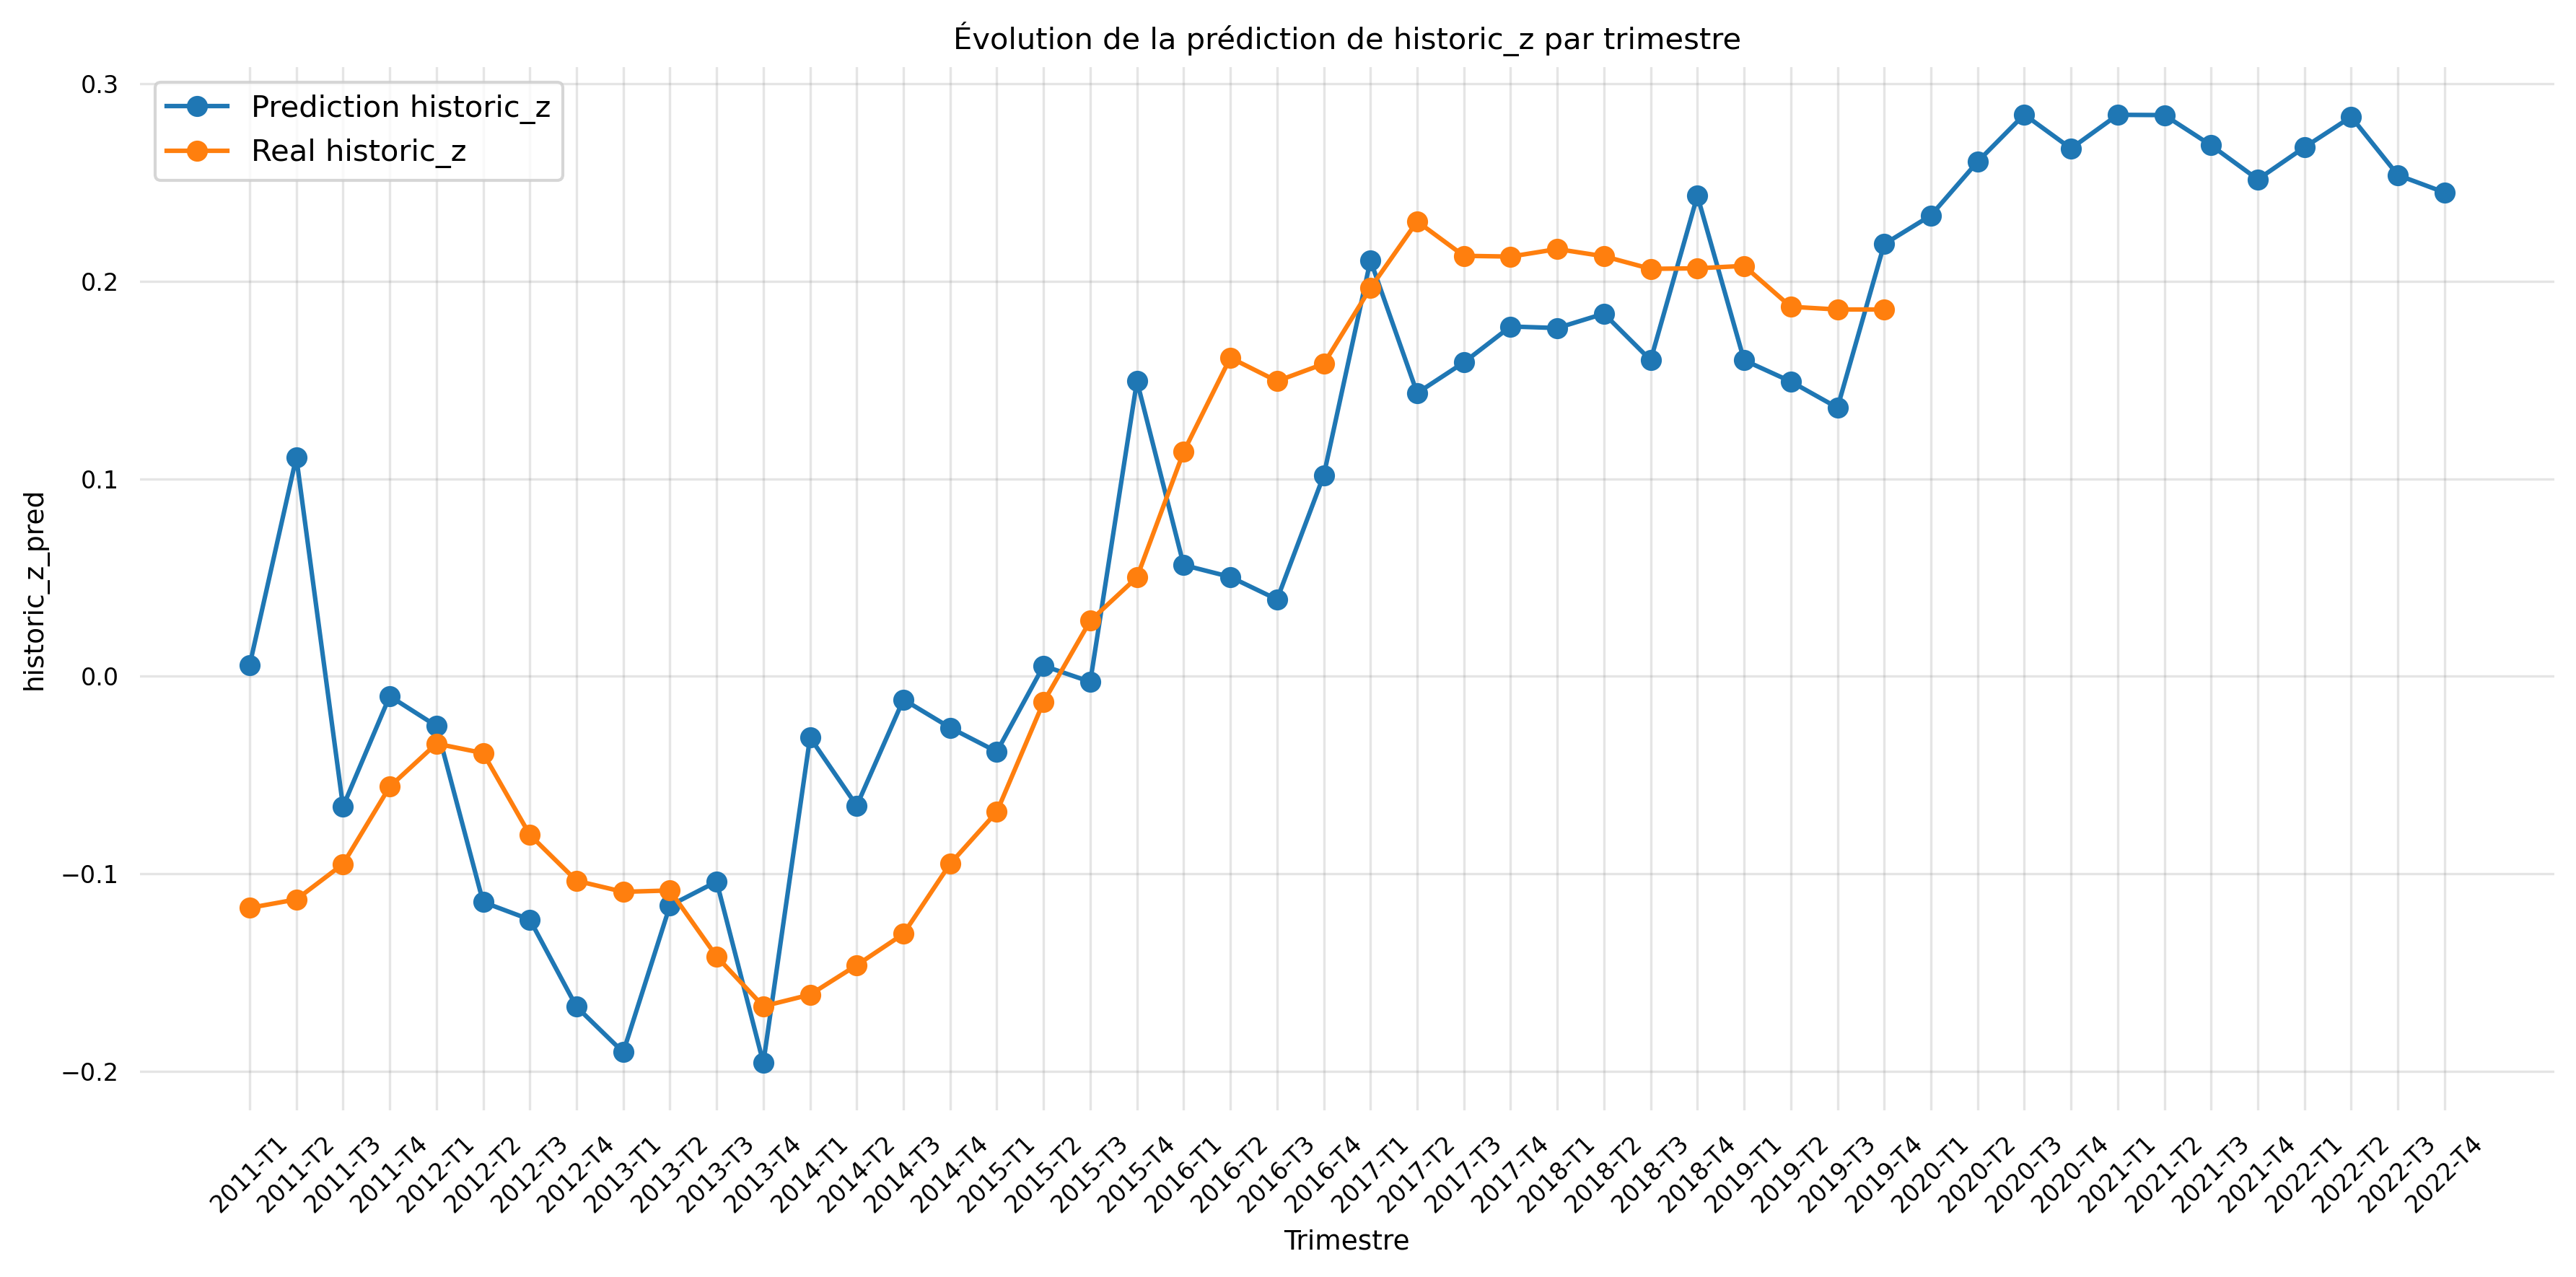

In [72]:
import matplotlib.pyplot as plt

# Filtrer les données non nulles
df_plot = merged_data_lags[["Trimestre", "historic_z_pred"]].query("historic_z_pred.notna()")

# Créer le graphique
plt.figure(figsize=(12, 6))
plt.plot(df_plot["Trimestre"], df_plot["historic_z_pred"], marker='o', linestyle='-', label='Prediction historic_z')
plt.plot(merged_data_lags["Trimestre"], merged_data_lags["historic_z"], marker='o', linestyle='-', label='Real historic_z')

plt.xticks(rotation=45)
plt.title("Évolution de la prédiction de historic_z par trimestre")
plt.xlabel("Trimestre")
plt.ylabel("historic_z_pred")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()